In [1]:
# Imorting required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

In [2]:
# Reading the dataset
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
# Printing first 5 rows of the data set
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Statistical Analysis - gives statistical data of the numerical data od the data set
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Descriptive Analysis - gives information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


2. Data Preprocessing


In [6]:
# Checking the null values - column wise checking
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
# Droping duplicates
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# Encoding Categorical Values into numerical values -female:0 -male:1
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# One-hot encoding for geography column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [12]:
# Scaling Numerical Features
scaler = StandardScaler()
df[['CreditScore', 'Age', 'Balance', 'EstimatedScalary', 'Tenure']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']])

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,EstimatedScalary
0,1,15634602,Hargrave,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,1,101348.88,1,False,False,0.021886
1,2,15647311,Hill,-0.440036,0,0.198164,-1.387538,0.117350,1,0,1,112542.58,0,False,True,0.216534
2,3,15619304,Onio,-1.536794,0,0.293517,1.032908,1.333053,3,1,0,113931.57,1,False,False,0.240687
3,4,15701354,Boni,0.501521,0,0.007457,-1.387538,-1.225848,2,0,0,93826.63,0,False,False,-0.108918
4,5,15737888,Mitchell,2.063884,0,0.388871,-1.041760,0.785728,1,1,1,79084.10,0,False,True,-0.365276


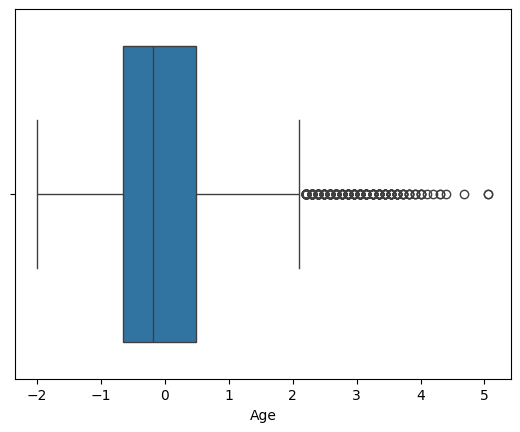

In [14]:
# Outlier Analysis - 1.Visualization method
sns.boxplot(x=df['Age'])
plt.show()


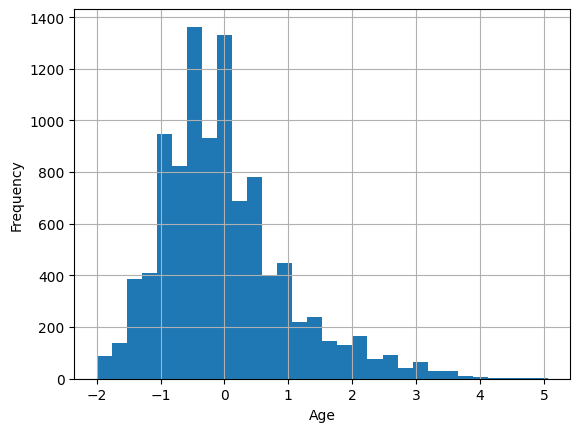

In [15]:
# Histogram
df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

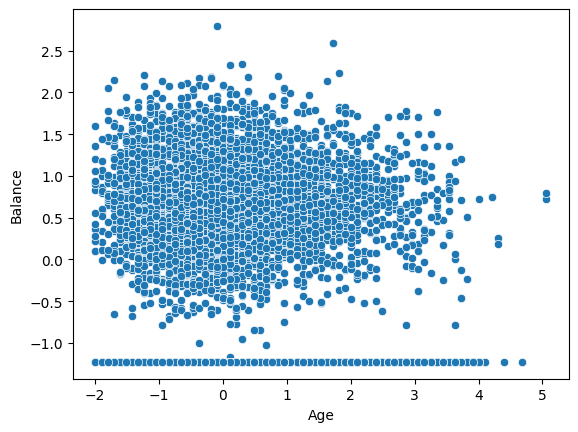

In [16]:
# Scatter Plot
sns.scatterplot(x='Age', y='Balance', data=df)
plt.show()

In [17]:
# Machine Learning Methods
# Isoation Forest
iso_forest = IsolationForest(contamination=0.001)
df['outlier'] = iso_forest.fit_predict(df[['CreditScore', 'Balance']])
outliers = df[df['outlier'] == -1]

In [18]:
print(df[['CreditScore', 'Balance', 'outlier']].head(10))  # View first 10 rows
print(df['outlier'].value_counts())  # Count of inliers (1) and outliers (-1)


   CreditScore   Balance  outlier
0    -0.326221 -1.225848        1
1    -0.440036  0.117350        1
2    -1.536794  1.333053        1
3     0.501521 -1.225848        1
4     2.063884  0.785728        1
5    -0.057205  0.597329        1
6     1.774174 -1.225848        1
7    -2.840488  0.618019        1
8    -1.547141  1.050820        1
9     0.346319  0.931463        1
outlier
 1    9990
-1      10
Name: count, dtype: int64


In [19]:
print(outliers.head())
print(f"Number of outliers: {len(outliers)}")


      RowNumber  CustomerId    Surname  CreditScore  Gender       Age  \
520         521    15671256  Macartney     2.063884       0 -0.373958   
942         943    15804586        Lin    -2.840488       0  0.674932   
1533       1534    15769818      Moore     2.063884       0 -0.183251   
4167       4168    15737509   Morrison     2.063884       1 -0.469311   
4533       4534    15607275     Ch'ang     2.063884       1  0.007457   

        Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
520  -1.387538  2.168282              1          1               0   
942   0.341352 -1.225848              1          1               0   
1533 -0.695982  2.184372              1          0               1   
4167  1.032908  1.967219              1          0               0   
4533  0.341352  2.075976              2          0               1   

      EstimatedSalary  Exited  Geography_Germany  Geography_Spain  \
520         188574.12       1              False            False   
94

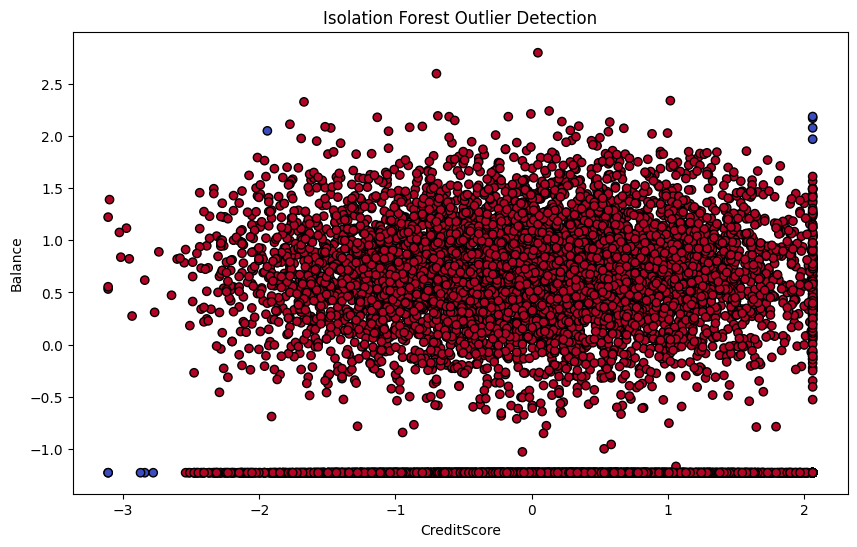

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['CreditScore'], df['Balance'], c=df['outlier'], cmap='coolwarm', edgecolor='k')
plt.xlabel('CreditScore')
plt.ylabel('Balance')
plt.title('Isolation Forest Outlier Detection')
plt.show()


In [21]:
# Cluster-Based methods
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['CreditScore', 'Balance']])
df['distance_to_centroid'] = kmeans.transform(df[['CreditScore', 'Balance']]).min(axis=1)
threshold = df['distance_to_centroid'].quantile(0.95)
outliers = df[df['distance_to_centroid'] > threshold]

In [22]:
print(df['cluster'].value_counts())


cluster
0    3729
1    3265
2    3006
Name: count, dtype: int64


In [23]:
print(df[['CreditScore', 'Balance', 'cluster', 'distance_to_centroid']].head(10))


   CreditScore   Balance  cluster  distance_to_centroid
0    -0.326221 -1.225848        0              0.322195
1    -0.440036  0.117350        2              0.723772
2    -1.536794  1.333053        2              0.922412
3     0.501521 -1.225848        0              0.507029
4     2.063884  0.785728        1              1.278434
5    -0.057205  0.597329        2              0.809024
6     1.774174 -1.225848        0              1.779271
7    -2.840488  0.618019        2              1.983865
8    -1.547141  1.050820        2              0.769215
9     0.346319  0.931463        1              0.488552


In [24]:
print(outliers.head())
print(f"Number of outliers: {len(outliers)}")


    RowNumber  CustomerId   Surname  CreditScore  Gender       Age    Tenure  \
6           7    15592531  Bartlett     1.774174       1  1.056346  0.687130   
7           8    15656148    Obinna    -2.840488       0 -0.946079 -0.350204   
11         12    15737173   Andrews    -1.588528       1 -1.422847 -0.695982   
12         13    15632264       Kay    -1.805810       0 -0.469311  1.724464   
24         25    15625047       Yen     2.022497       0 -0.087897 -0.004426   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
6  -1.225848              2          1               1         10062.80   
7   0.618019              4          1               0        119346.88   
11 -1.225848              2          1               0         76390.01   
12 -1.225848              2          1               0         26260.98   
24 -1.225848              1          1               1        187616.16   

    Exited  Geography_Germany  Geography_Spain  EstimatedScalary  ou

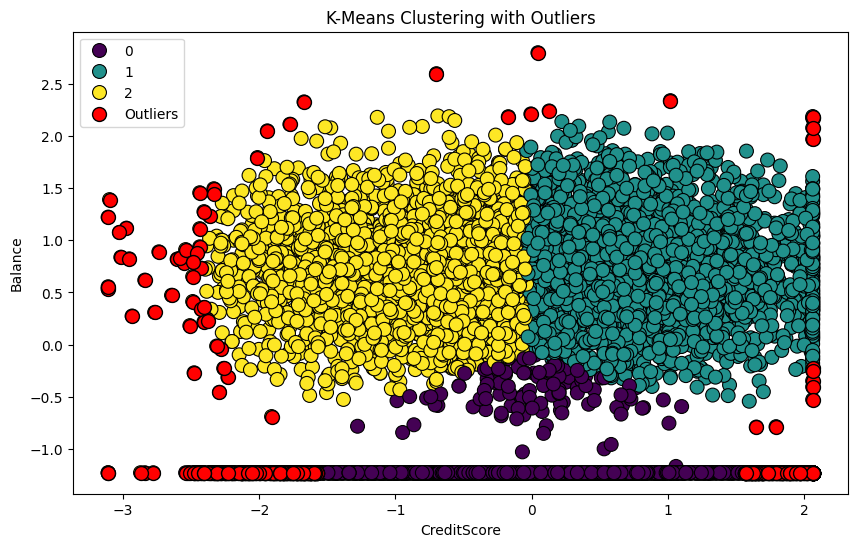

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='Balance', hue='cluster', data=df, palette='viridis', edgecolor='k', s=100)
# Highlight the outliers in red
plt.scatter(outliers['CreditScore'], outliers['Balance'], color='red', label='Outliers', s=100, edgecolor='black')
plt.xlabel('CreditScore')
plt.ylabel('Balance')
plt.title('K-Means Clustering with Outliers')
plt.legend()
plt.show()


In [26]:
inliers = df[df['distance_to_centroid'] <= threshold]
print("Inliers summary:")
print(inliers[['CreditScore', 'Balance']].describe())

print("\nOutliers summary:")
print(outliers[['CreditScore', 'Balance']].describe())


Inliers summary:
       CreditScore      Balance
count  9503.000000  9503.000000
mean      0.008919     0.050393
std       0.919455     0.985290
min      -2.395577    -1.225848
25%      -0.646971    -1.225848
50%       0.015222     0.378180
75%       0.656722     0.835989
max       2.063884     2.190270

Outliers summary:
       CreditScore     Balance
count   497.000000  497.000000
mean     -0.170541   -0.963542
std       1.983714    0.764568
min      -3.109504   -1.225848
25%      -2.033439   -1.225848
50%      -1.588528   -1.225848
75%       1.887989   -1.225848
max       2.063884    2.795323


3. Exploratory Data Analysis (EDA)

In [27]:
# Statistical Summary

# Statistical summary of numerical features
print(df.describe())

# Get the statistical summary for specific columns (e.g., Age, CreditScore, Tenure)
print(df[['Age', 'CreditScore', 'Tenure']].describe())


         RowNumber    CustomerId   CreditScore        Gender           Age  \
count  10000.00000  1.000000e+04  1.000000e+04  10000.000000  1.000000e+04   
mean    5000.50000  1.569094e+07 -4.824585e-16      0.545700  2.318146e-16   
std     2886.89568  7.193619e+04  1.000050e+00      0.497932  1.000050e+00   
min        1.00000  1.556570e+07 -3.109504e+00      0.000000 -1.994969e+00   
25%     2500.75000  1.562853e+07 -6.883586e-01      0.000000 -6.600185e-01   
50%     5000.50000  1.569074e+07  1.522218e-02      1.000000 -1.832505e-01   
75%     7500.25000  1.575323e+07  6.981094e-01      1.000000  4.842246e-01   
max    10000.00000  1.581569e+07  2.063884e+00      1.000000  5.061197e+00   

             Tenure       Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count  1.000000e+04  1.000000e+04   10000.000000  10000.00000    10000.000000   
mean  -1.078249e-16 -6.252776e-17       1.530200      0.70550        0.515100   
std    1.000050e+00  1.000050e+00       0.581654      

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


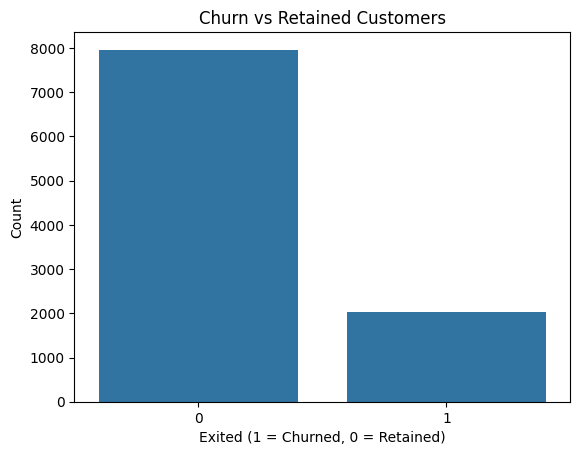

In [28]:
# Check the churn distrubutiin (Exited = 1 means churned, 0 means retained)
churn_counts = df['Exited'].value_counts(normalize=True)
print(churn_counts)

# Visualize the distribution
sns.countplot(x='Exited', data=df)
plt.title('Churn vs Retained Customers')
plt.xlabel('Exited (1 = Churned, 0 = Retained)')
plt.ylabel('Count')
plt.show()

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,EstimatedScalary,outlier,cluster,distance_to_centroid
0,1,15634602,Hargrave,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,1,101348.88,1,False,False,0.021886,1,0,0.322195
1,2,15647311,Hill,-0.440036,0,0.198164,-1.387538,0.117350,1,0,1,112542.58,0,False,True,0.216534,1,2,0.723772
2,3,15619304,Onio,-1.536794,0,0.293517,1.032908,1.333053,3,1,0,113931.57,1,False,False,0.240687,1,2,0.922412
3,4,15701354,Boni,0.501521,0,0.007457,-1.387538,-1.225848,2,0,0,93826.63,0,False,False,-0.108918,1,0,0.507029
4,5,15737888,Mitchell,2.063884,0,0.388871,-1.041760,0.785728,1,1,1,79084.10,0,False,True,-0.365276,1,1,1.278434


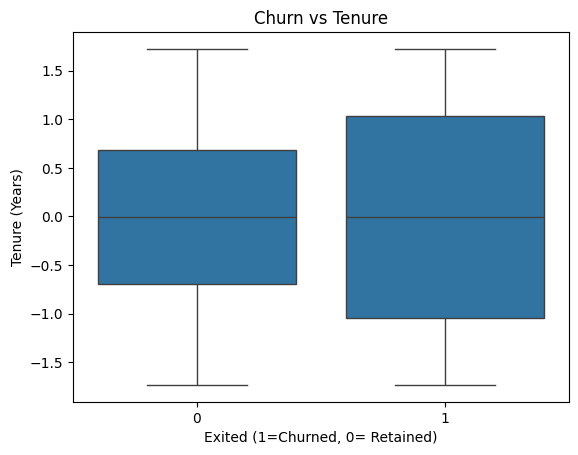

In [30]:
# Tenure vs Churn
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Churn vs Tenure')
plt.xlabel('Exited (1=Churned, 0= Retained)')
plt.ylabel('Tenure (Years)')
plt.show()


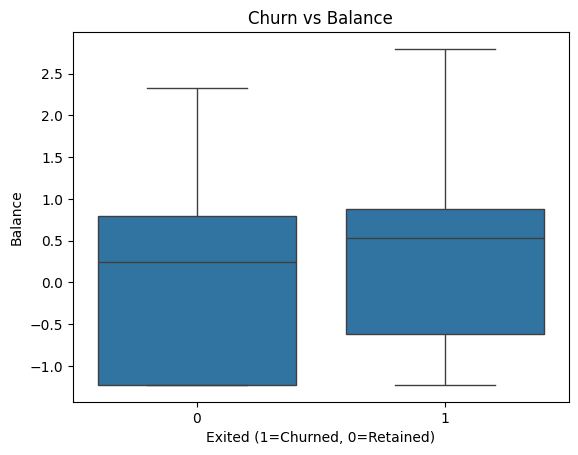

In [31]:
# Payment Method vs Churn
sns.boxplot(x='Exited', y='Balance', data =df)
plt.title('Churn vs Balance')
plt.xlabel('Exited (1=Churned, 0=Retained)')
plt.ylabel('Balance')
plt.show()

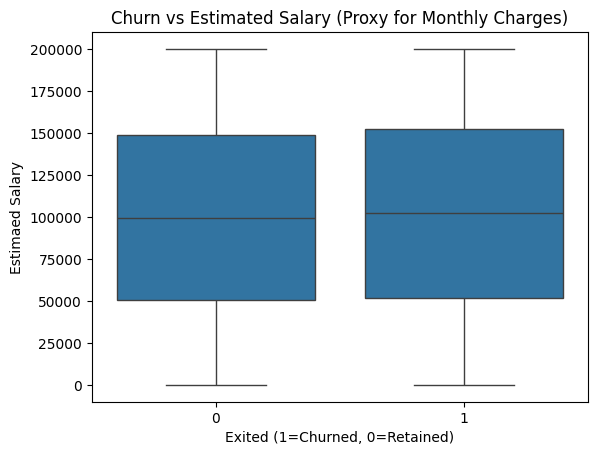

In [32]:
# Montly Charges vs Churn
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Churn vs Estimated Salary (Proxy for Monthly Charges)')
plt.xlabel('Exited (1=Churned, 0=Retained)')
plt.ylabel('Estimaed Salary')
plt.show()

Gender
0    0.250715
1    0.164559
Name: Exited, dtype: float64


<ipython-input-33-31726cd11214>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn.index, y=gender_churn.values, palette='coolwarm')


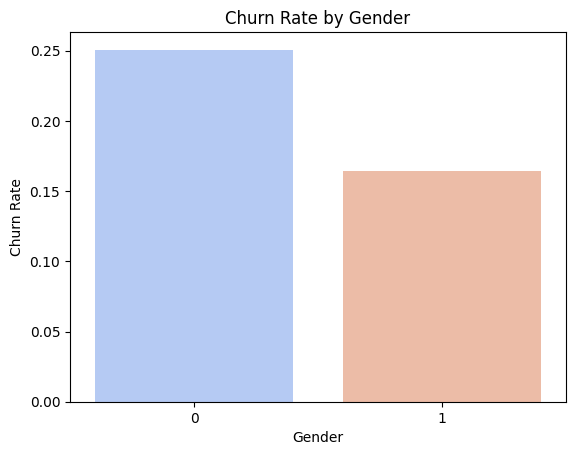

In [33]:
# Churn Rate by Different Features
# Churn rate by Gender
gender_churn = df.groupby('Gender')['Exited'].mean()
print(gender_churn)

#Visualize churn rate by Gender
sns.barplot(x=gender_churn.index, y=gender_churn.values, palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

In [34]:
print("Maximum Tenure Value:", df['Tenure'].max())
print("Minimum Tenure Value:",df['Tenure'].min())

Maximum Tenure Value: 1.7244635794717436
Minimum Tenure Value: -1.7333154938995745


Maximum Tenure Value: 1.7244635794717436


<ipython-input-35-eb19208be726>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ContractType', y='Exited', data=df, palette='coolwarm')


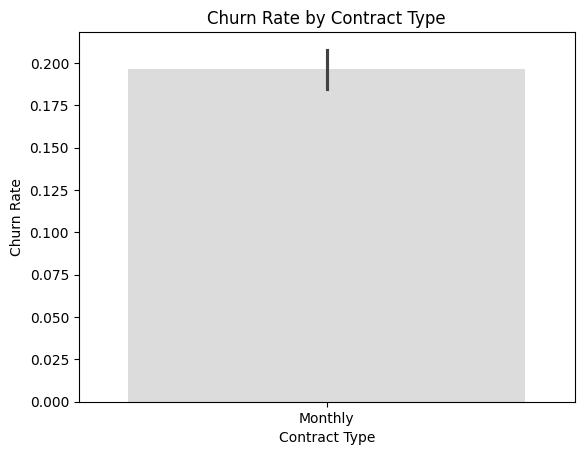

In [35]:
# Debugging Maximum Tenure
max_tenure = df['Tenure'].max()
print("Maximum Tenure Value:", max_tenure)

# Define bins based on actual max tenure
if max_tenure <= 12:
    bins = [0, max_tenure + 1]  # Only one category: Monthly
    labels = ['Monthly']
elif max_tenure <= 36:
    bins = [0, 12, max_tenure + 1]  # Monthly and Annual
    labels = ['Monthly', 'Annual']
else:
    bins = [0, 12, 36, max_tenure + 1]  # Monthly, Annual, Multi-Year
    labels = ['Monthly', 'Annual', 'Multi-Year']

# Apply pd.cut to categorize ContractType
df['ContractType'] = pd.cut(df['Tenure'], bins=bins, labels=labels, include_lowest=True)

# Barplot for Contract Type vs Churn
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='ContractType', y='Exited', data=df, palette='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


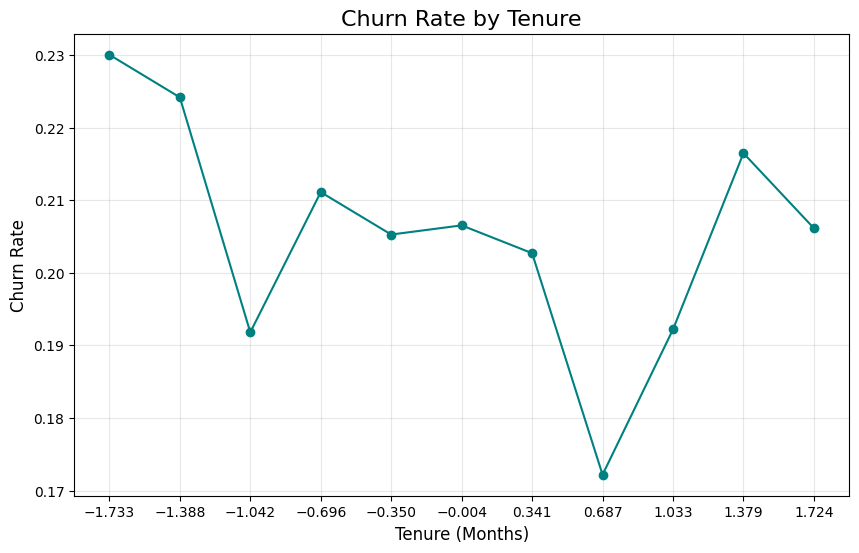

In [36]:
#2. Tenure and Churn
# Group by Tenure and calculate churn rate
tenure_churn = df.groupby('Tenure')['Exited'].mean()

# Plot Churn Rate by Tenure
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(tenure_churn.index, tenure_churn.values, marker='o', linestyle='-', color='teal')
plt.title('Churn Rate by Tenure', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(tenure_churn.index)
plt.show()


<ipython-input-37-144cf677a74a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_churn = df.groupby('BalanceBin')['Exited'].mean()
<ipython-input-37-144cf677a74a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balance_churn.index, y=balance_churn.values, palette='coolwarm')


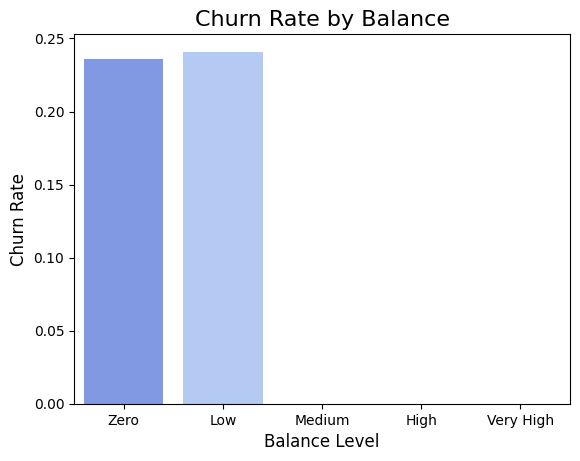

In [37]:
# 3. Monthly CHarges and churn
# Create custom bins for Balance
bins = [-1, 0, 50000, 100000, 150000, 250000]  # Adjust ranges based on data distribution
labels = ['Zero', 'Low', 'Medium', 'High', 'Very High']
df['BalanceBin'] = pd.cut(df['Balance'], bins=bins, labels=labels)

# Group by BalanceBin and calculate churn rate
balance_churn = df.groupby('BalanceBin')['Exited'].mean()

# Bar plot for Balance vs Churn
sns.barplot(x=balance_churn.index, y=balance_churn.values, palette='coolwarm')
plt.title('Churn Rate by Balance', fontsize=16)
plt.xlabel('Balance Level', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.show()



5. Data Visualization


<ipython-input-38-c1998e101a39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Exited', data=df, palette='viridis')


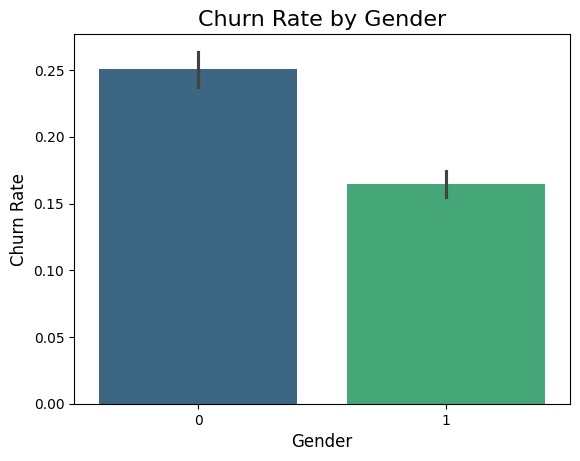

<ipython-input-38-c1998e101a39>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsActiveMember', y='Exited', data=df, palette='viridis')


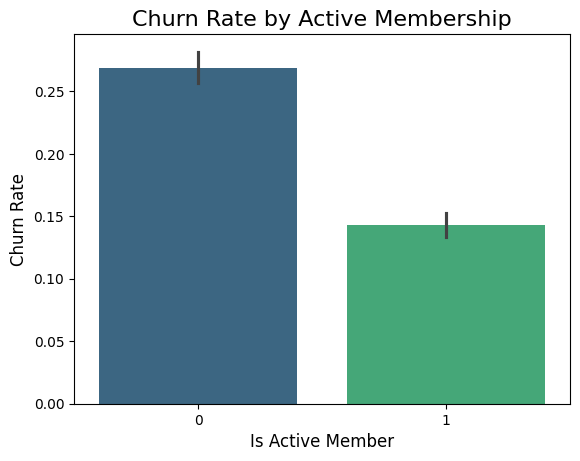

In [38]:
# Churn Rate by Gender
sns.barplot(x='Gender', y='Exited', data=df, palette='viridis')
plt.title('Churn Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.show()

# Churn Rate by Active Membership
sns.barplot(x='IsActiveMember', y='Exited', data=df, palette='viridis')
plt.title('Churn Rate by Active Membership', fontsize=16)
plt.xlabel('Is Active Member', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.show()


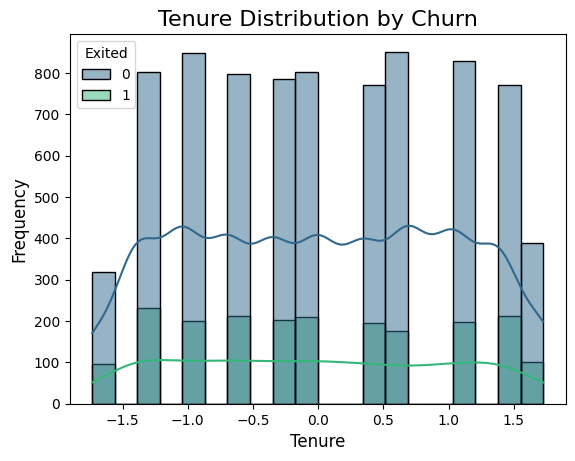

<ipython-input-39-64a450f4ce7d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='viridis')


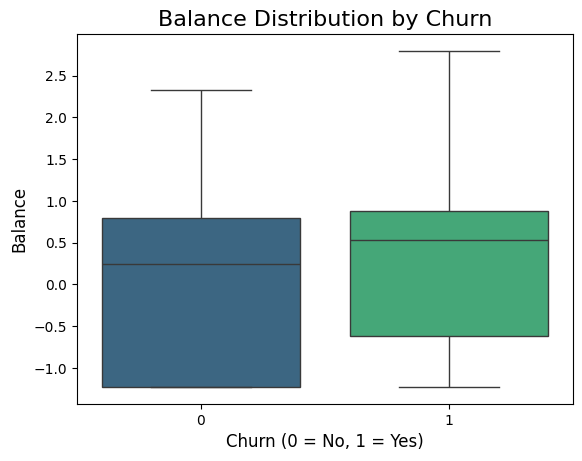

In [39]:
# 2. Histograms and Box Plots
# Histogram for Tenure
sns.histplot(data=df, x='Tenure', hue='Exited', kde=True, bins=20, palette='viridis')
plt.title('Tenure Distribution by Churn', fontsize=16)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Box plot for Balance
sns.boxplot(x='Exited', y='Balance', data=df, palette='viridis')
plt.title('Balance Distribution by Churn', fontsize=16)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.show()


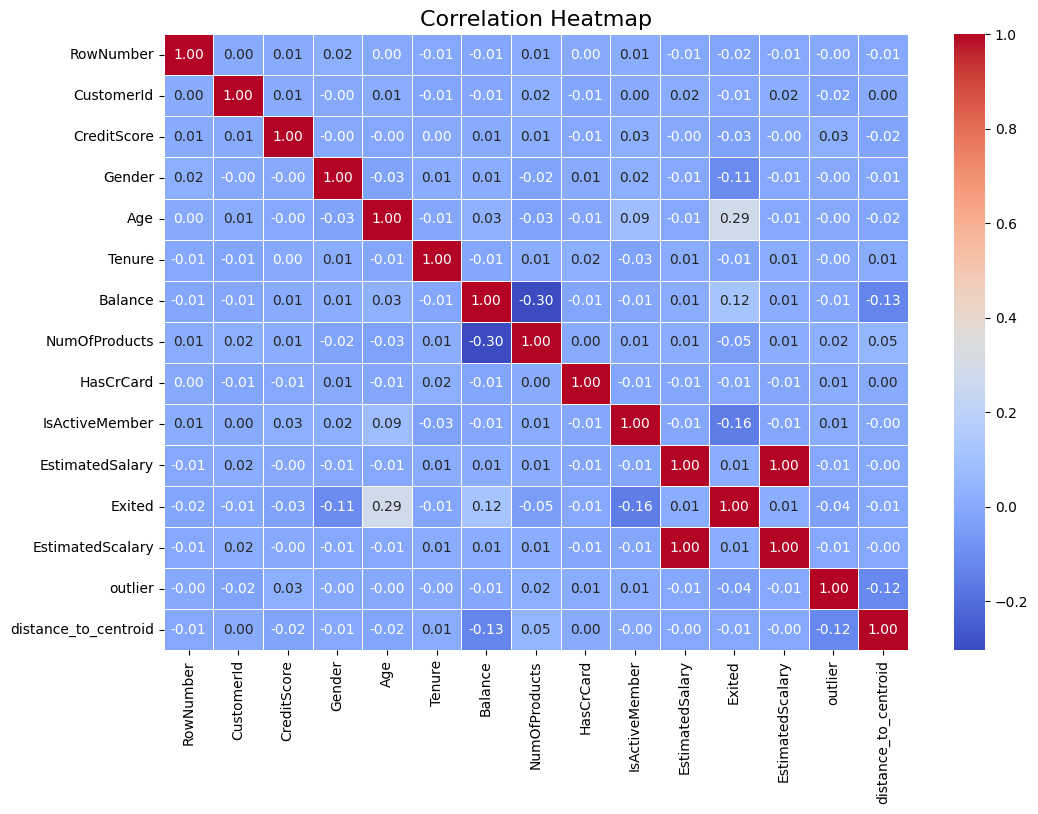

In [40]:
# 3. Correlation Heatmap
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [41]:
# Rename 'ContractType_1' to 'ContractType'
df.rename(columns={'ContractType_1': 'ContractType'}, inplace=True)


In [42]:
# Verify the column names after renaming
print(df.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'EstimatedScalary', 'outlier', 'cluster', 'distance_to_centroid',
       'ContractType', 'BalanceBin'],
      dtype='object')


In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'ContractType' column
df['ContractType'] = label_encoder.fit_transform(df['ContractType'])

# Check the encoded values
print(df[['ContractType']].head())


   ContractType
0             1
1             1
2             0
3             1
4             1


6. Applying Machine Learning Models